In [1]:
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath('../scripts'))

In [2]:
from data_analysis_preprocessing import *

In [3]:
df_creditcard = pd.read_csv('../data/creditcard.csv')
df_fraud = pd.read_csv('../data/Fraud_Data.csv')
df_ipaddress = pd.read_csv('../data/IpAddress_to_Country.csv')

1. Handle Missing Values
- Impute or drop missing value

In [4]:
print("Missing values before handling for credit card:")
print(df_creditcard.isnull().sum())

Missing values before handling for credit card:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
print("Missing values before handling for fraud:")
print(df_fraud.isnull().sum())

Missing values before handling for fraud:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64


In [6]:
print("Missing values before handling for Ip address:")
print(df_ipaddress.isnull().sum())

Missing values before handling for Ip address:
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64


# Missing Values Report

- Credit Card Dataset
The credit card dataset contains **no missing values** across all columns, including `Time`, `V1` through `V28`, `Amount`, and `Class`.

- Fraud Dataset
Similarly, the fraud dataset has **no missing values** in any of its columns, such as `user_id`, `signup_time`, `purchase_time`, `purchase_value`, `device_id`, `source`, `browser`, `sex`, `age`, `ip_address`, and `class`.

- IP Address Dataset
The IP address dataset is also complete, with **no missing values** in `lower_bound_ip_address`, `upper_bound_ip_address`, and `country`.

In summary, all three datasets are free of missing data, so no further imputation or handling of missing values is necessary at this stage.


2. Data Cleaning

In [7]:
# Removing duplicates and correcting the data types
clean_data(df_creditcard, df_fraud, df_ipaddress)


Credit Card Data Types:
 Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int32
dtype: object
Fraud Data Types:
 user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int32
ip_address               float64
class                      int64
dtype: object


# Data Types Report

- Credit Card Dataset
The data types for the credit card dataset have been successfully updated. All `V` columns and `Amount` are of type **float64**, while the `Class` column is correctly converted to **int32**. This ensures that numerical features are properly formatted for further analysis and model training.

- **Time**: `float64`
- **V1 - V28**: `float64`
- **Amount**: `float64`
- **Class**: `int32`

- Fraud Dataset
For the fraud dataset, the `signup_time` and `purchase_time` columns have been converted to **datetime64[ns]**, which is crucial for any time-based analysis. The `age` column has been successfully converted to **int32**, while other categorical fields like `device_id`, `source`, `browser`, and `sex` remain as **object** data types. This is appropriate for categorical encoding if needed later on.

- **user_id**: `int64`
- **signup_time**: `datetime64[ns]`
- **purchase_time**: `datetime64[ns]`
- **purchase_value**: `int64`
- **device_id**: `object`
- **source**: `object`
- **browser**: `object`
- **sex**: `object`
- **age**: `int32`
- **ip_address**: `float64`
- **class**: `int64`


3. Exploratory Data Analysis

Univariate Analysis:


c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


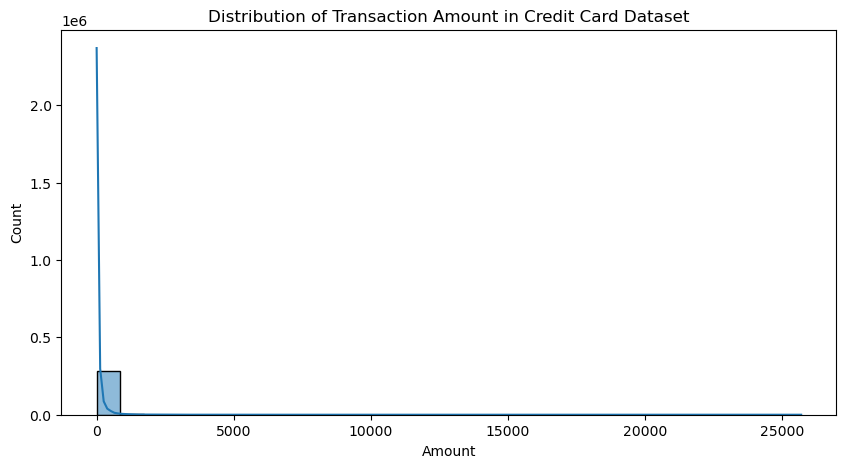

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


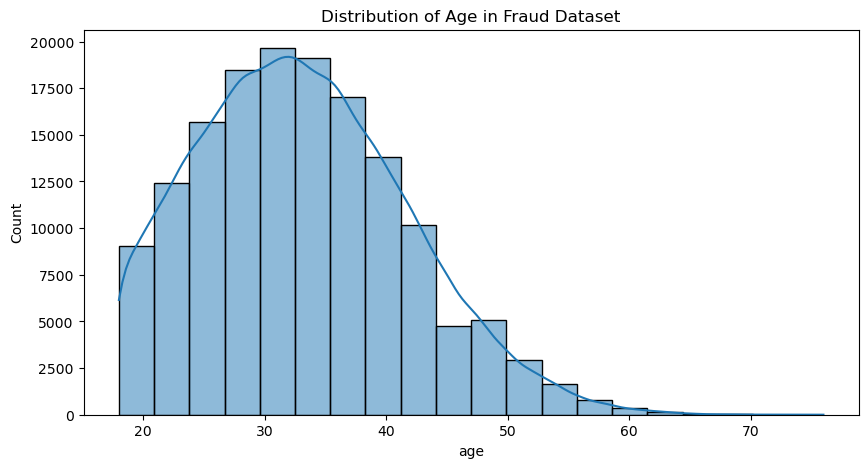

Bivariate Analysis:


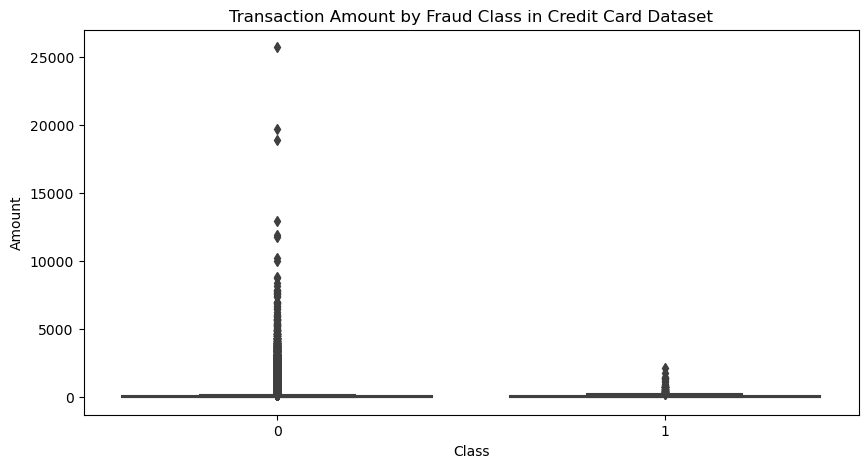

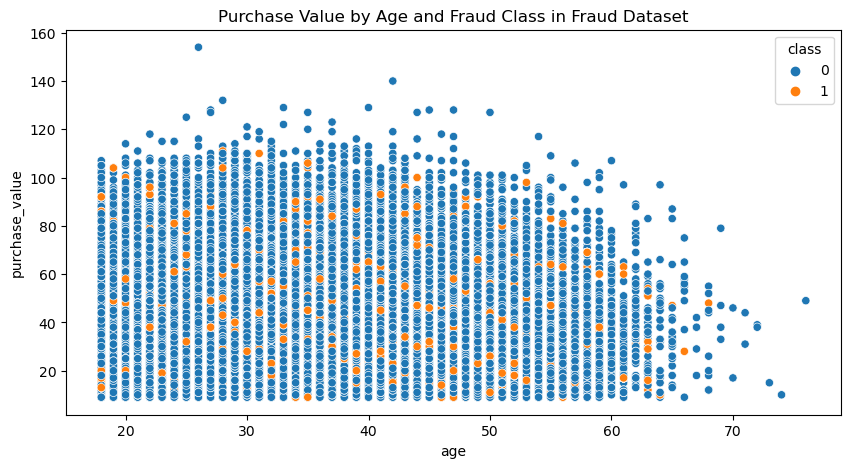

In [8]:
# Call the function with datasets
perform_eda(df_creditcard, df_fraud)

# Reports on Fraud Analysis

## Purchase Value by Age and Fraud Class
- **Objective**: Visualize the relationship between age, purchase value, and fraud class.
- **Data Description**:
  - **Age**: 0 to 70 years.
  - **Purchase Value**: 0 to 160 units.
  - **Fraud Class**: 
    - Class 0 (blue): Non-fraudulent
    - Class 1 (orange): Fraudulent
- **Observations**:
  - **Distribution**: No clear clustering or pattern between classes.
  - **Correlation**: No obvious correlation among age, purchase value, and fraud class.
- **Conclusion**: Age and purchase value may not be sufficient indicators for fraud detection; additional features needed.

---

## Age Distribution in Fraud Dataset
- **Objective**: Illustrate the distribution of ages in a fraud dataset.
- **Data Description**:
  - **Age Range**: 0 to 70 years.
  - **Count Range**: 0 to 20,000 individuals.
- **Observations**:
  - **Peak Age Group**: 30-35 years has the highest count.
  - **Distribution Pattern**: Right-skewed; counts decrease with age after mid-30s.
- **Conclusion**: Early 30s individuals are most represented; valuable for targeting fraud prevention.

---

## Transaction Amount by Fraud Class
- **Objective**: Illustrate the relationship between transaction amounts and fraud classes.
- **Data Description**:
  - **Class**: 
    - Class 0: Non-fraudulent
    - Class 1: Fraudulent
  - **Amount**: 0 to 25,000 units.
- **Observations**:
  - **Class 0**: Densely packed near the bottom with some outliers.
  - **Class 1**: Fewer data points, mostly lower amounts.
- **Conclusion**: Most transactions are low in amount; high-value transactions are rare, especially in Class 1.

---

## Transaction Amount Distribution
- **Objective**: Illustrate the distribution of transaction amounts.
- **Data Description**:
  - **Amount Range**: 0 to 25,000 units.
  - **Count Range**: 0 to 1,000,000 transactions.
- **Observations**:
  - **High Frequency of Low Amounts**: Majority clustered near zero.
  - **Sparse High Amounts**: Few transactions with higher amounts.
- **Conclusion**: Most transactions are low; understanding this can help identify spending behaviors and detect anomalies.


4. Merge Datasets for Geolocation Analysis

- Merge df_fraud.csv with IpAddress_to_Country.csv


In [9]:
# Merge the DataFrames
merged_data = merge_fraud_data_with_geolocation(df_fraud, df_ipaddress)
print(merged_data.head())

# Save the merged DataFrame to a new CSV file
merged_data.to_csv('../data/Merged_df_fraud_with_Geolocation.csv', index=False)


        user_id         signup_time       purchase_time  purchase_value  \
151111   138208 2015-06-10 07:02:20 2015-07-21 02:03:53              20   
63344    329438 2015-02-07 20:36:48 2015-02-28 21:43:52              18   
121121   319411 2015-01-08 11:11:50 2015-03-06 23:37:00              36   
121122    24894 2015-01-07 05:59:11 2015-01-07 05:59:12              35   
121123   368181 2015-02-28 18:28:52 2015-03-06 16:32:41              35   

            device_id  source  browser sex  age    ip_address  class  \
151111  ZINIADFCLHYPG  Direct       IE   M   38  4.103825e+09      0   
63344   QSHYBRYJBNKMU     SEO       IE   M   24  3.283051e+09      0   
121121  CJHWRXISOAYTL     SEO       IE   M   48  2.970766e+09      0   
121122  NWREMPUXZSXWE     SEO  FireFox   F   46  2.503225e+09      1   
121123  HNQIPDXVRNDZU  Direct   Chrome   M   29  3.902230e+09      0   

        ip_address_numeric  upper_bound_ip_address        country  
151111         -2147483648           -1.064080e+

5. Feature Engineering
- Transaction frequency and velocity for df_fraud.csv
- Time-Based features for df_fraud.csv
(hour_of _day,
day_of_week)


In [10]:
df_fraud['signup_time'] = pd.to_datetime(df_fraud['signup_time'])
df_fraud['purchase_time'] = pd.to_datetime(df_fraud['purchase_time'])

fraud_data_cleaned = feature_engineering(df_fraud)
print(fraud_data_cleaned.head())

1
2
3
4
5
6
   purchase_value  device_id    ip_address  class  ip_address_numeric  \
0              34          1  7.327584e+08      0           732758368   
1              16          1  3.503114e+08      0           350311387   
2              15         12  2.621474e+09      1         -2147483648   
3              44          1  3.840542e+09      0         -2147483648   
4              39          1  4.155831e+08      0           415583117   

   signup_duration_days  hour_of_purchase  day_of_week  transaction_count  \
0                    52                 2            5                  1   
1                     0                 1            0                  1   
2                     0                18            3                  1   
3                     5                13            0                  1   
4                    50                18            2                  1   

   average_purchase_value  total_purchase_value  source_Direct  source_SEO  \
0       

In [11]:
# Save the cleaned DataFrame to a new CSV file
fraud_data_cleaned.to_csv('../data/fraud_data_cleaned.csv', index=False)

 Report on Merging Fraud Data with Geolocation

 1. Function Overview: `merge_fraud_data_with_geolocation`
The function `merge_fraud_data_with_geolocation` is designed to integrate fraud transaction data with geolocation information based on IP addresses. 

 Key Steps:
1. **IP Address Conversion**: The `ip_address` column in the fraud dataset is converted to a numeric format (`int32`) for efficient processing.
2. **Indexing for Merging**: The `ip_address_data` is indexed by the `lower_bound_ip_address`, facilitating quick lookups during the merge.
3. **Efficient Merging**: 
   - The function employs `pd.merge_asof` to perform an approximate merge, matching fraud records with the closest higher `lower_bound_ip_address` from the geolocation dataset. This approach optimizes performance when dealing with large datasets.
   - The `direction='forward'` parameter ensures that only higher values are matched, preserving data integrity.

 Output:
- The function returns a merged DataFrame that combines both fraud transaction and geolocation data, enabling further analysis.
 2. Data Processing Steps
After merging, the following steps are executed:

1. **Datetime Conversion**: The `signup_time` and `purchase_time` columns in the `df_fraud` DataFrame are converted to `datetime` objects for time-based feature extraction.
2. **Feature Engineering**: The `feature_engineering` function is applied to extract and construct meaningful features from the fraud dataset.
3. **Saving the Cleaned Data**: Finally, the cleaned and enriched DataFrame is saved as a CSV file (`fraud_data_cleaned.csv`), ensuring it is ready for subsequent analysis or modeling.

This structured approach to data merging and cleaning enhances the dataset's utility for fraud detection analysis.


6. Normalization and Scaling
7. Encode Categorical Features

In [16]:
# Normalizing the fraud data
df_fraud = pd.read_csv('../data/fraud_data_cleaned.csv')
normalize_fraud_data(df_fraud)

   purchase_value  device_id    ip_address  class  ip_address_numeric  \
0        0.172414          1  7.327584e+08      0           732758368   
1        0.048276          1  3.503114e+08      0           350311387   
2        0.041379         12  2.621474e+09      1         -2147483648   
3        0.241379          1  3.840542e+09      0         -2147483648   
4        0.206897          1  4.155831e+08      0           415583117   

   signup_duration_days  hour_of_purchase  day_of_week  transaction_count  \
0              0.436975          0.086957     0.833333                0.0   
1              0.000000          0.043478     0.000000                0.0   
2              0.000000          0.782609     0.500000                0.0   
3              0.042017          0.565217     0.000000                0.0   
4              0.420168          0.782609     0.333333                0.0   

   average_purchase_value  total_purchase_value  source_Direct  source_SEO  \
0                0.1

In [18]:
# Normalizing the creditcard data
normalize_creditcard_data(df_creditcard)

#### Report on Data Preprocessing for Fraud Detection

##### 1. Feature Engineering
 1.1 Time-Based Features
- **Signup Duration**: Calculated `signup_duration_days` as the difference in days between `signup_time` and `purchase_time`.
- **Hour of Purchase**: Extracted `hour_of_purchase` from the `purchase_time`.
- **Day of the Week**: Derived `day_of_week` from the `purchase_time`.

 1.2 Transaction Frequency
- **Transaction Count**: Calculated `transaction_count` for each user using `groupby` on `user_id`.

 1.3 Transaction Value Features
- **Average Purchase Value**: Computed `average_purchase_value` per user.
- **Total Purchase Value**: Summed `total_purchase_value` per user.

 1.4 Encoding Categorical Features
- **Device ID Encoding**: Frequency encoded `device_id` based on its occurrence.
- **Source and Browser**: Applied one-hot encoding to `source` and `browser` columns.

 1.5 Encoding Sex and Age
- **Sex Encoding**: Encoded `sex` to binary values (`F` as `0`, `M` as `1`).
- **Age Normalization**: Normalized `age` using z-score normalization.

 1.6 Dropping Unnecessary Columns
- Removed columns that are no longer needed: `signup_time`, `purchase_time`, `sex`, `age`, and `user_id`.

##### 2. Normalization and Scaling
 2.1 Fraud Data Normalization
- **Normalized Features**: Applied Min-Max scaling to the following columns:
  - `purchase_value`
  - `signup_duration_days`
  - `hour_of_purchase`
  - `day_of_week`
  - `transaction_count`
  - `average_purchase_value`
  - `total_purchase_value`

 2.2 Credit Card Data Normalization
- **Normalized Features**: Applied Min-Max scaling to:
  - `Amount`
  - `Time`
- **Not Normalized**: Target variable `Class` and PCA features (`V1` to `V28`) were not normalized.


In [19]:
# Save the featured DataFrame to a new CSV file
df_fraud.to_csv('../data/fraud_data_featured.csv', index=False)
df_creditcard.to_csv('../data/creditcard_data_featured.csv', index= False)